In [ ]:
import numpy as np
import pandas as pd

import scanpy as sc
import anndata

import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [ ]:
mc_ad = sc.read('covid_metacells.h5ad')


# Concatenate aggregated anndatas across different samples

mc_ad.obs = mc_ad.obs.rename(columns={'initial_clustering':'celltype', 'sample_id':'sample'})
mc_ad.obs.head()

,sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,full_clustering,celltype,Resample,Collection_Day,...,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome,patient_id,n_counts,Metacell_Size,Metacell,Metacell_Entropy
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGGCCT-MH8919333,MH8919333,1209,1209,2637.0,48.0,1.820250,CD14_mono,CD14,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919333,4093.0,1,ACATCAGCAAGCGCTC-newcastle004v2,1.048740
AAACCTGAGACAGAGA-MH8919332,MH8919332,819,819,1797.0,63.0,3.505843,CD8.TE,CD8,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919332,3796.0,1,AAACCTGAGACAGAGA-MH8919332,0.000000
AAACCTGAGACTTTCG-newcastle74,newcastle74,968,968,2214.0,99.0,4.471545,CD8.EM,CD8,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,newcastle74,6291.0,2,AAACCTGAGACAGAGA-MH8919332,0.640808
AAACCTGAGAGACTTA-MH8919283,MH8919283,842,842,2212.0,187.0,8.453888,B_immature,B_cell,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919283,17562.0,3,AAACCTGAGATGCCAG-MH9143277,0.083965
AAACCTGAGCCCAGCT-MH8919178,MH8919178,2017,2017,6319.0,233.0,3.687292,CD14_mono,CD14,Initial,D0,...,Healthy,Ncl,nan,Healthy,Home,MH8919178,166548.0,11,TGCCCTAGTCATACTG-MH8919282,1.381535


# SEACell Integration Across Samples

## Batch Correction

In [ ]:
## Compute UMAP from un-integrated data
sc.pp.neighbors(mc_ad, use_rep='X_pca')
sc.tl.umap(mc_ad)

... storing 'SEACell' as categorical
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/scanpy/plotting/_utils.py:315: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


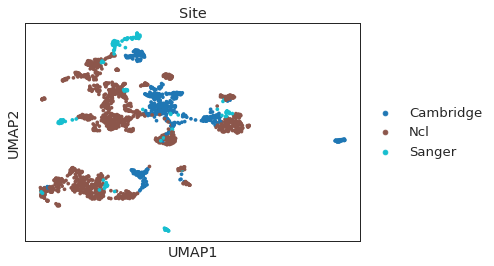

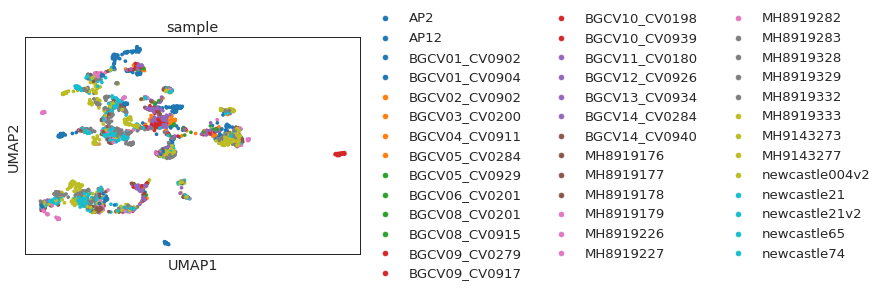

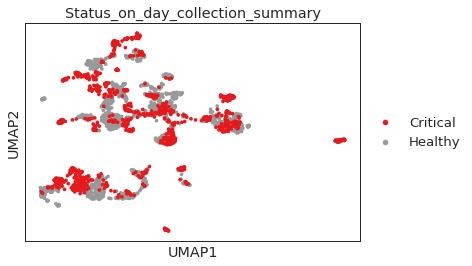

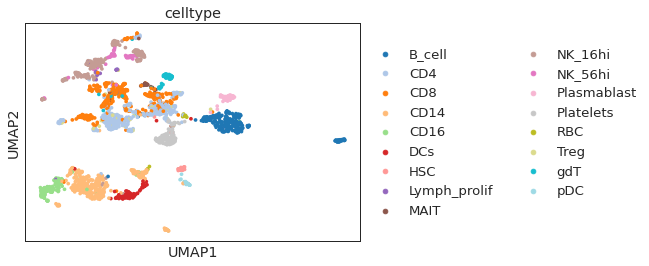

In [ ]:
# Visualize data before integration
sc.pl.umap(mc_ad, color='Site', palette='tab10')
sc.pl.umap(mc_ad, color='sample', palette='tab10')
sc.pl.umap(mc_ad, color='Status_on_day_collection_summary', palette='Set1')
sc.pl.umap(mc_ad, color='celltype', palette='tab20')

In [ ]:
sc.external.pp.harmony_integrate(mc_ad, 'sample')

2022-03-18 09:40:55,785 - harmonypy - INFO - Iteration 1 of 10
2022-03-18 09:40:56,254 - harmonypy - INFO - Iteration 2 of 10
2022-03-18 09:40:56,672 - harmonypy - INFO - Iteration 3 of 10
2022-03-18 09:40:57,045 - harmonypy - INFO - Iteration 4 of 10
2022-03-18 09:40:57,413 - harmonypy - INFO - Iteration 5 of 10
2022-03-18 09:40:57,789 - harmonypy - INFO - Iteration 6 of 10
2022-03-18 09:40:58,154 - harmonypy - INFO - Iteration 7 of 10
2022-03-18 09:40:58,563 - harmonypy - INFO - Iteration 8 of 10
2022-03-18 09:40:58,980 - harmonypy - INFO - Converged after 8 iterations


In [ ]:
## Compute UMAP from integrated data
sc.pp.neighbors(mc_ad, use_rep='X_pca_harmony')
sc.tl.umap(mc_ad)

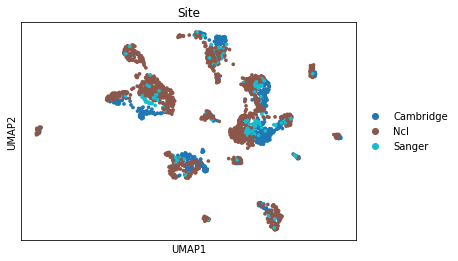

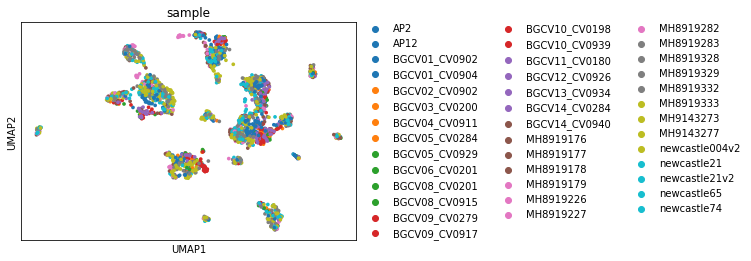

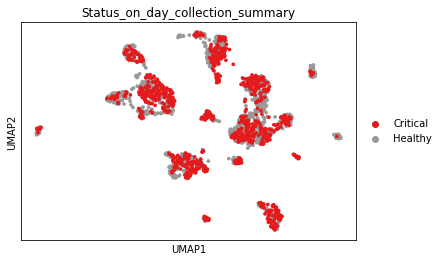

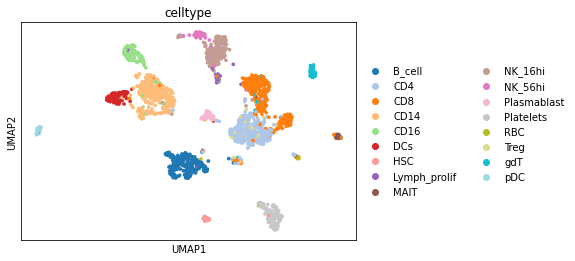

In [ ]:
# Visualize data after integration
sc.pl.umap(mc_ad, color='Site', palette='tab10')
sc.pl.umap(mc_ad, color='sample', palette='tab10')
sc.pl.umap(mc_ad, color='Status_on_day_collection_summary', palette='Set1')
sc.pl.umap(mc_ad, color='celltype', palette='tab20')

## SEA2Cell Computation

In [ ]:
from SEACells.core import SEACells

model = SEACells(mc_ad,
                  build_kernel_on='X_pca_harmony',
                  n_SEACells=mc_ad.shape[1]//100,
                  n_waypoint_eigs=10,
                  convergence_epsilon = 1e-6)

model.fit(n_iter=100)

Building kernel...
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...



Making graph symmetric...
Computing RBF kernel...



Building similarity LIL matrix...



Constructing CSR matrix...
Building kernel on X_pca_harmony
Computing diffusion components from X_pca_harmony for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 194 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...



Selecting 55 cells from greedy initialization.
Randomly initialized A matrix.
Setting convergence threshold at 0.0004729635710106716
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Starting iteration 40.
Completed iteration 40.
Starting iteration 50.
Completed iteration 50.
Starting iteration 60.
Completed iteration 60.
Starting iteration 70.
Completed iteration 70.
Starting iteration 80.
Completed iteration 80.
Starting iteration 90.
Completed iteration 90.
Starting iteration 100.
Completed iteration 100.
Converged after 100 iterations.


## SEA2Cell Aggregation

In [ ]:
from SEACells.core import  summarize_by_SEACell
mmc_ad = summarize_by_SEACell(mc_ad)

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [ ]:
mc_ad.var_names

AnnData object with n_obs × n_vars = 2185 × 24929
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'celltype', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'n_counts', 'Metacell_Size', 'Metacell', 'Metacell_Entropy', 'SEACell'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Metacell_colors', 'Site_colors', 'Status_on_day_collection_summary_colors', 'hvg', 'initial_clustering_colors', 'neighbors', 'pca', 'sample_id_colors', 'umap', 'sample_colors', 'celltype_colors'
    obsm: 'X_diffusion', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [ ]:
mmc_ad.obs = mmc_ad.obs.join(mc_ad.obs.groupby('Metacell').agg(lambda x: pd.Series.mode(x)[0])['celltype'])

In [ ]:
sc.pp.highly_variable_genes(mmc_ad, n_top_genes=1500)
sc.pp.pca(mmc_ad,  use_highly_variable=True)

## Compute UMAP from integrated data
sc.pp.neighbors(mmc_ad, use_rep='X_pca')
sc.tl.umap(mmc_ad)

In [ ]:
sc.pl.umap(mmc_ad, color='celltype')

# SEA2Cell label shuffling - permutation test

Randomly re-label metacells by SEA2Cells (thus keeping SEA2Cell proportions constant)

In [ ]:
n_trials = 1000
metacell_label = 'SEA2Cell' for sc_ad

proportions = pd.DataFrame(mc_ad.obs.groupby('Metacell').apply(lambda x: (x['Status_on_day_collection_summary']=='Critical').sum()/len(x))).rename(columns={0:'test_value'})

metacell_label = 'Metacell'
metacells = mc_ad.obs[['sample', 'Status_on_day_collection_summary', metacell_label]]

from tqdm.notebook import tqdm

for trial in tqdm(range(n_trials)):
    metacells['Metacell'] = np.random.permutation(metacells['Metacell'])
    # Compute SEA2Cell COVID proportions based on new metacell conditions
    proportions[trial] = metacells.groupby(metacell_label).apply(lambda x: (x['Status_on_day_collection_summary']=='Critical').sum()/len(x))


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
pvals = {}
for index, row in proportions.iterrows():
    pvals[index] = (row.values>=row['test_value']).sum()/len(row)

pvals = pd.DataFrame.from_dict(data=pvals, orient='index').rename(columns={0:'p-value'})

In [ ]:
pvals.to_csv('COVID_enrichment_pvals.csv')

Text(0, 0.5, 'Proportion_COVID')

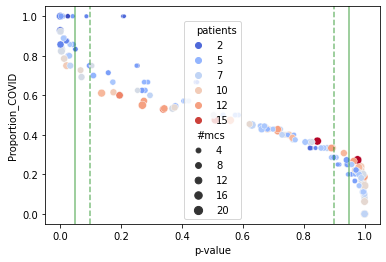

In [ ]:
sizes = pd.DataFrame(mc_ad.obs.groupby('Metacell').apply(lambda x: len(np.unique(x['sample'])))).rename(columns={0:'patients'})

sizes = sizes.join(pd.DataFrame(mc_ad.obs.groupby('Metacell').count()['sample']).rename(columns={'sample':'#mcs'}))

sizes['p-value'] = pvals['p-value']
sizes['test_value'] = proportions['test_value']

sns.scatterplot(data=sizes, x='p-value', y='test_value', hue='patients', size='#mcs', palette='coolwarm')
plt.axvline(x=0.05, c='green', alpha=0.5)
plt.axvline(x=0.95, c='green', alpha=0.5)
plt.axvline(x=0.1, linestyle='dashed', c='green', alpha=0.5)
plt.axvline(x=0.9, linestyle='dashed', c='green', alpha=0.5)

plt.ylabel('Proportion_COVID')



/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AAACCTGAGACAGAGA-MH8919332', ylabel='Density'>

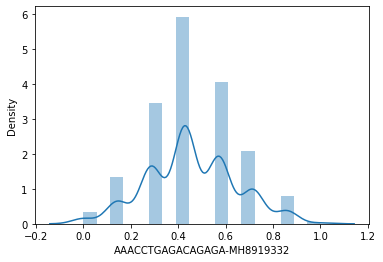

In [ ]:
sns.distplot(proportions.iloc[0])

In [ ]:
mmc_ad = sc.read('covid_metametacells_annotated.h5ad')

In [ ]:
sizes = mmc_ad.obs[['celltype']].join(sizes)

In [ ]:
celltype = 'CD8'

significant_CD4 = sizes[(sizes['celltype']==celltype) & (sizes['p-value']<0.1)]
significant_CD4


,celltype,patients,#mcs,p-value,test_value
Metacell,,,,,
AGGGTGATCTTGGGTA-newcastle004v2,CD8,3,6,0.066933,0.833333
CAACTAGTCACTATTC-newcastle21,CD8,6,10,0.027972,0.800000
CATGCCTGTCCCTTGT-MH9143273,CD8,3,7,0.045954,0.857143
S11_TGACTAGGTAGTAGTA-1,CD8,2,10,0.000999,1.000000
TGCCCTAAGGATATAC-MH9143277,CD8,1,5,0.023976,1.000000
TAAGCGTTCCGTAGGC-MH8919328,CD8,3,15,0.000999,1.000000


In [ ]:
differential_expression = pd.read_csv(f'/Users/sitarapersad/tmp_mcs/COVID_analysis/diff_expression_by_SEA2Cell/genes_{celltype}.csv', index_col=[0], header=[0,1])

In [ ]:
differential_expression = differential_expression[significant_CD4.index]

dfs = {}
for col in differential_expression.columns.get_level_values(0):
    df = differential_expression[col]
    tmp = df.sort_values('logFC', ascending=False)
    tmp.index = df.index
    dfs[col] = tmp

genes = pd.concat(dfs, axis=1)


In [ ]:
annots = mmc_ad.obs.loc[significant_CD4.index][['celltype','celltype_purity',
                                       'Proportion_Healthy',
                                       'Average_Days_From_Onset',
                                       'Number_of_Patients',
                                       'Number_of_Cells']]





In [ ]:
annots[annots['celltype_purity']0.9]

In [ ]:
from collections import Counter
mc_ad.obs.groupby('Metacell').apply(lambda x: Counter(x['celltype'])).loc[annots.index]

Metacell
AGGGTGATCTTGGGTA-newcastle004v2    {'CD4': 1, 'MAIT': 1, 'CD8': 4}
CAACTAGTCACTATTC-newcastle21                           {'CD8': 10}
CATGCCTGTCCCTTGT-MH9143273                              {'CD8': 7}
S11_TGACTAGGTAGTAGTA-1                                 {'CD8': 10}
TGCCCTAAGGATATAC-MH9143277                              {'CD8': 5}
TAAGCGTTCCGTAGGC-MH8919328                             {'CD8': 15}
dtype: object

In [ ]:
sc_ad = sc.read('covid_singlecells.h5ad')

In [ ]:
sc_ad.obs.groupby('SEA2Cell').apply(lambda x: Counter(x['celltype'])).loc[annots.index]



SEA2Cell
AGGGTGATCTTGGGTA-newcastle004v2    {'CD8': 347, 'gdT': 6, 'Treg': 6, 'CD4': 34, '...
CAACTAGTCACTATTC-newcastle21       {'CD8': 768, 'MAIT': 4, 'CD4': 47, 'gdT': 1, '...
CATGCCTGTCCCTTGT-MH9143273         {'CD8': 643, 'CD4': 176, 'Treg': 19, 'MAIT': 7...
S11_TGACTAGGTAGTAGTA-1             {'CD8': 953, 'gdT': 7, 'NK': 19, 'CD4': 34, 'L...
TGCCCTAAGGATATAC-MH9143277         {'CD8': 411, 'gdT': 53, 'MAIT': 5, 'Lymph_prol...
TAAGCGTTCCGTAGGC-MH8919328         {'CD8': 1183, 'MAIT': 2, 'gdT': 20, 'Treg': 1,...
dtype: object

In [ ]:
constituents = sc_ad.obs.groupby(['SEA2Cell', 'celltype']).size().loc[annots.index]

In [ ]:
data = {'SEA2Cell':[]}
for x in constituents.index.get_level_values(0).unique():
    data['SEA2Cell'].append(x)
    for y in (constituents.loc[x]).index:
        data[y] = data.get(y, []) + [constituents.loc[x].loc[y].values[0]]

In [ ]:
pd.DataFrame(data).set_index('SEA2Cell').to_csv('constituent_celltypes_CD8.csv')

In [ ]:
genes = genes[annots.index]

In [ ]:
annots.to_csv(f'{celltype}_annot_M02.csv')
genes.to_csv(f'{celltype}_genes_M02.csv')

# Differentially Expressed Genes

In [ ]:
for celltype in mmc_ad.obs['celltype'].unique():
    if str(celltype) in ['Mixed', 'nan']:
        continue

    # Subset to this celltype only

    tmp_ad = mmc_ad[mmc_ad.obs_names[mmc_ad.obs['celltype']==celltype]]

    print(f'Processing {celltype}... {tmp_ad.shape}')
    tmp_ad2 = mc_ad[mc_ad.obs_names[mc_ad.obs['Metacell'].isin(tmp_ad.obs_names)]]

    sc.tl.rank_genes_groups(tmp_ad2, groupby='Metacell', use_raw=False, n_genes=500)

    names = pd.DataFrame(tmp_ad2.uns['rank_genes_groups']['names'])
    names.columns = pd.MultiIndex.from_product([names.columns, ['names']])
    logFC = pd.DataFrame(tmp_ad2.uns['rank_genes_groups']['logfoldchanges'])
    logFC.columns = pd.MultiIndex.from_product([logFC.columns, ['logFC']])
    pvals = pd.DataFrame(tmp_ad2.uns['rank_genes_groups']['pvals'])
    pvals.columns = pd.MultiIndex.from_product([pvals.columns, ['pvals']])

    df = pd.concat([names, logFC, pvals], axis=1)

    SEA2Cells_sorted_by_logFC = tmp_ad.obs[mmc_ad.obs['celltype']==celltype]['logFC'].sort_values().index
    df = df[df.columns.reindex(SEA2Cells_sorted_by_logFC, level=0)[0]]

    df.to_csv(f'diff_expression_by_SEA2Cell/genes_{celltype}.csv')


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing B_cell... (21, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing CD14... (39, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing CD4... (35, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing NK... (25, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing Platelets... (14, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing pDC... (2, 24929)
Processing Plasmablast... (5, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing Lymph_prolif... (2, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Processing gdT... (4, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing DCs... (10, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing CD8... (32, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing MAIT... (3, 24929)
Processing CD16... (12, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.

Trying to set attribute `.uns` of view, copying.


Processing HSC... (2, 24929)


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
human_TFs = pd.read_csv('/Users/sitarapersad/data/human_TF.txt', sep='\t')
human_TFs

,Species,Symbol,Ensembl,Family,Protein,Entrez ID
0,Homo_sapiens,ZBTB8B,ENSG00000273274,ZBTB,ENSP00000476499;ENSP00000476499;,728116
1,Homo_sapiens,GSX2,ENSG00000180613,Homeobox,ENSP00000319118;ENSP00000483522;,170825
2,Homo_sapiens,TBX2,ENSG00000121068,T-box,ENSP00000404781;ENSP00000240328;,6909
3,Homo_sapiens,PAX8,ENSG00000125618,PAX,ENSP00000395498;ENSP00000263335;ENSP0000038076...,7849
4,Homo_sapiens,CREB3L1,ENSG00000157613,TF_bZIP,ENSP00000481956;ENSP00000436574;,90993
...,...,...,...,...,...,...
1660,Homo_sapiens,ZNF487,ENSG00000243660,Others,-,642819
1661,Homo_sapiens,NME2,ENSG00000243678,Others,-,4831
1662,Homo_sapiens,ZNF488,ENSG00000265763,Others,-,118738
1663,Homo_sapiens,DMRTC1,ENSG00000269502,Others,-,63947


1498

In [ ]:
for celltype in mmc_ad.obs['celltype'].unique():

    if celltype in ['Mixed']:
        continue

    # Subset to this celltype only

    tmp_ad = mmc_ad[mmc_ad.obs_names[mmc_ad.obs['celltype']==celltype]]
    tmp_ad = tmp_ad[tmp_ad.obs_names[tmp_ad.obs['Enriched_In'].isin(['Healthy','Covid'])]]

    if not ('Healthy' in tmp_ad.obs['Enriched_In'].values and 'Covid' in tmp_ad.obs['Enriched_In'].values):
        print(f'Cannot process {celltype}')
        continue

    print(f'Processing {celltype}...')

    tmp_ad.obs['Enriched_In'] = tmp_ad.obs['Enriched_In'].astype('category')

    tmp_ad2 = mc_ad[mc_ad.obs_names[mc_ad.obs['Metacell'].isin(tmp_ad.obs_names)]]
    tmp_ad2.obs = tmp_ad2.obs.merge(tmp_ad.obs[['Enriched_In']], left_on='Metacell', right_index=True)
    tmp_ad2 = tmp_ad2[:, len(np.intersect1d(human_TFs['Symbol'].values, tmp_ad2.var_names))]

    sc.tl.rank_genes_groups(tmp_ad2, groupby='Enriched_In', use_raw=False, n_genes=500)

    names = pd.DataFrame(tmp_ad2.uns['rank_genes_groups']['names'])
    names.columns = pd.MultiIndex.from_product([names.columns, ['names']])
    logFC = pd.DataFrame(tmp_ad2.uns['rank_genes_groups']['logfoldchanges'])
    logFC.columns = pd.MultiIndex.from_product([logFC.columns, ['logFC']])
    pvals = pd.DataFrame(tmp_ad2.uns['rank_genes_groups']['pvals'])
    pvals.columns = pd.MultiIndex.from_product([pvals.columns, ['pvals']])

    df = pd.concat([names, logFC, pvals], axis=1)

    df.loc[df[('Covid', 'pvals')]>0.05, ('Covid', 'pvals')] = 'ns'
    df.loc[df[('Healthy', 'pvals')]>0.05, ('Healthy', 'pvals')] = 'ns'

    df.to_csv(f'diff_expression/TFs_{celltype}.csv')

    print(df.head())

Trying to set attribute `.obs` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Metacell' as categorical


Processing B_cell...


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Metacell' as categorical


        Covid     Healthy      Covid    Healthy Covid Healthy
        names       names      logFC      logFC pvals   pvals
0  AC234582.1  AC234582.1 -27.513716  27.513716    ns      ns
Processing CD14...
        Covid     Healthy     Covid   Healthy Covid Healthy
        names       names     logFC     logFC pvals   pvals
0  AC234582.1  AC234582.1  0.777876 -0.777876    ns      ns
Processing CD4...

/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Metacell' as categorical


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Metacell' as categorical


        Covid     Healthy     Covid   Healthy Covid Healthy
        names       names     logFC     logFC pvals   pvals
0  AC234582.1  AC234582.1  0.674401 -0.674401    ns      ns
Processing NK...


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Metacell' as categorical


        Covid     Healthy     Covid   Healthy Covid Healthy
        names       names     logFC     logFC pvals   pvals
0  AC234582.1  AC234582.1  0.350673 -0.350673    ns      ns
Processing Platelets...
        Covid     Healthy     Covid   Healthy Covid Healthy
        names       names     logFC     logFC pvals   pvals
0  AC234582.1  AC234582.1  25.55374 -25.55374    ns      ns


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical


Cannot process pDC
Cannot process Plasmablast
Cannot process Lymph_prolif
Cannot process gdT
Cannot process DCs
Processing CD8...


Trying to set attribute `.obs` of view, copying.
... storing 'Metacell' as categorical


        Covid     Healthy     Covid   Healthy Covid Healthy
        names       names     logFC     logFC pvals   pvals
0  AC234582.1  AC234582.1  0.274246 -0.274246    ns      ns
Cannot process MAIT
Cannot process nan
Cannot process CD16
Cannot process HSC


/Users/sitarapersad/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
